# Housing Price Prediction

![Imag2.png](attachment:Imag2.png)

## Problem Statement 
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 


The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

1. Which variables are significant in predicting the price of a house, and

2. How well those variables describe the price of a house.


Also, determine the optimal value of lambda for ridge and lasso regression.


## Business Goal 


You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# Methodology
Model development is divided into multiple steps as mentioned below,

- Data exploring and understanding: This step involves preliminary level data understanding and exploring.
- Data Cleaning: This step includes cleaning the existing data. We check the data for any missing values and treat them as per the requirements. We also need to look for constant value colulmns as that is not going to add any additional value to out analysis. Sometimes columns with very high proportion of any particular value also doesn't add any values. Hence, getting rid of them helps with further analysis.
- Data Visualization: This step involves visualizing our dataset and check for relationship amongst independent variables. We can also reduce some feature columns here but it should not be aggressive.
- Data Preparation: This step is mainly usefull for feeding in the data into the model. It involves steps like creating dummy variables, scaling etc. depending upond the data type.
- Train-test split: As data already training data this step may be skipped.
- Model Development-validation and evaluaiton: This steps involves training the model and validate it. It involves evaluating the model using relevant matrics.
- Conclusion/Recommendation: It involves drawing conclusions and recommendations to business.

### Importing dependencies

In [1049]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.max_colwidth", None)
%matplotlib inline

### Reading Dataset

In [1050]:
#Reading data
#Housing data= hd
hd= pd.read_csv(r"C:\Users\Rohit Chaudhary\Desktop\Upgrad notes\ML2\Assignment\train.csv")
hd.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 1. Data Understanding and Exploration

In [1051]:
#Sale price is our dependent/target variable

In [1052]:
#Understanding data
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [1053]:
# Checking columns with null value more than 50%
hd.isnull().sum()/hd.shape[0]*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [1054]:
#Dropping columns with null value ~50% including variable FireplaceQu having 47.26% null values
hd=hd.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'], axis = 1)

In [1055]:
#As we can see there are multiple categorical varaibles lets list them out as ordinal, nominal categorical variables,
#Continous/numeric variavles, year & month etc.
nominal = ["MSSubClass","MSZoning","Street","LandContour","Utilities","LotConfig","LandSlope"
    ,"Neighborhood","Condition1","Condition2","BldgType","HouseStyle","RoofStyle","RoofMatl","Exterior1st"
    ,"Exterior2nd","MasVnrType","Foundation","Heating","HeatingQC","CentralAir","Electrical","Functional"
    ,"GarageType","PavedDrive","SaleType","SaleCondition"]

ordinal = ["LotShape","OverallQual","OverallCond","ExterQual","ExterCond","BsmtQual","BsmtCond","BsmtExposure",
         "BsmtFinType1","BsmtFinType2","KitchenQual","GarageFinish","GarageQual","GarageCond"]

numeric = ["LotFrontage","LotArea","MasVnrArea","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF",
         "LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr",
         "KitchenAbvGr","TotRmsAbvGrd","Fireplaces","GarageCars","GarageArea","WoodDeckSF",
        "OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","BsmtFinSF1","BsmtFinSF2"]

year_month = ["YearBuilt","YearRemodAdd","GarageYrBlt","MoSold","YrSold"]

In [1056]:
len(nominal)+len(ordinal)+len(numeric)+len(year_month)

74

## 2. Data Visualization

In [1057]:
# ALl the Numeric variables are either int or float type data type
#Lot size and MiscVal has higher values in comparison to other numeric varaibles, thus it will be analyzied seperately
numeric.remove("LotArea") 
numeric.remove("MiscVal") 

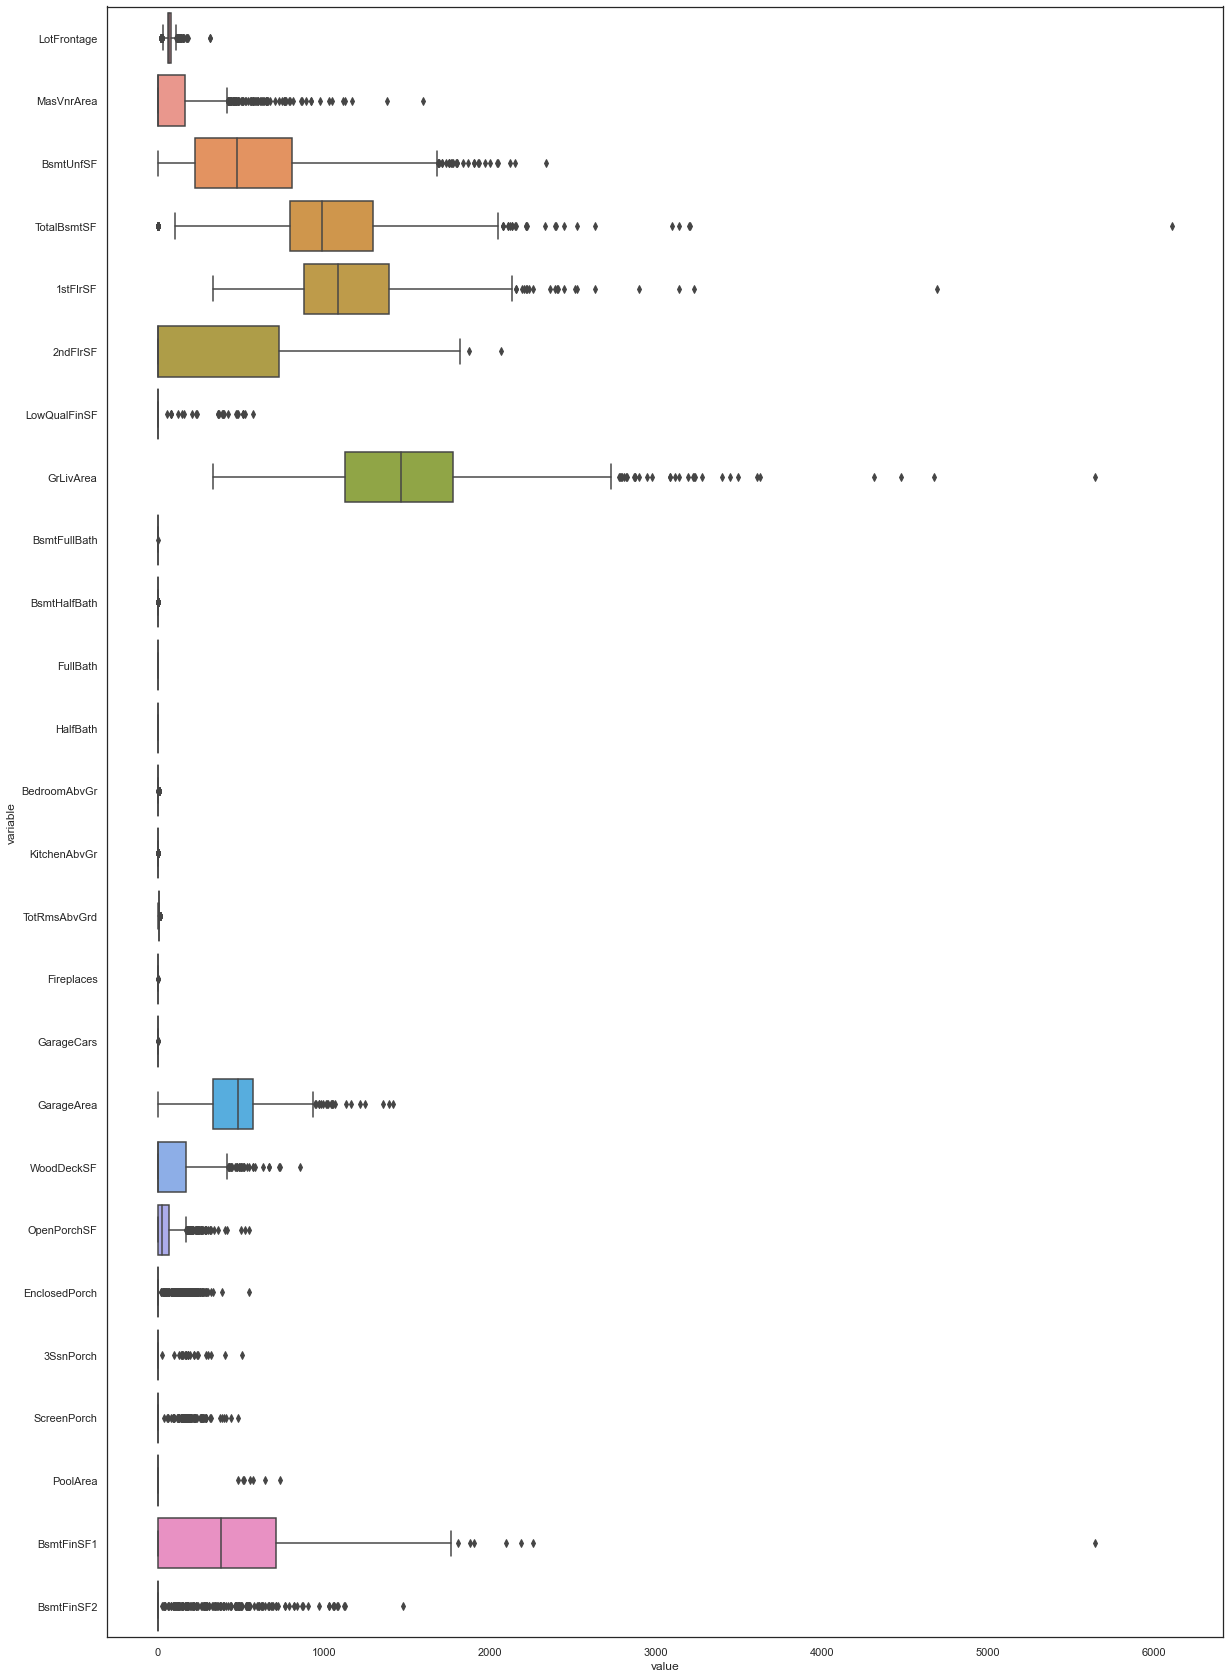

In [1058]:
#Lets do the univariate analysis on Numeric data typesLotArea
plt.figure(figsize=(20,30))
sns.boxplot(x="value", y="variable",data=pd.melt(hd[numeric]))
plt.show()

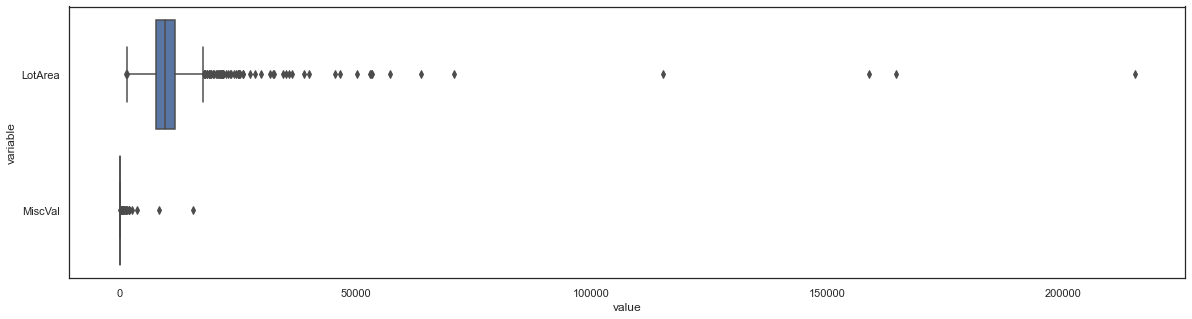

In [1059]:
#box plot for LotArea and MiscVal variable
plt.figure(figsize=(20,5))
sns.boxplot(x="value", y="variable",data=pd.melt(hd[["LotArea","MiscVal"]]))
plt.show()

There are lots of outliers in various columns and we have to treat them before modeling

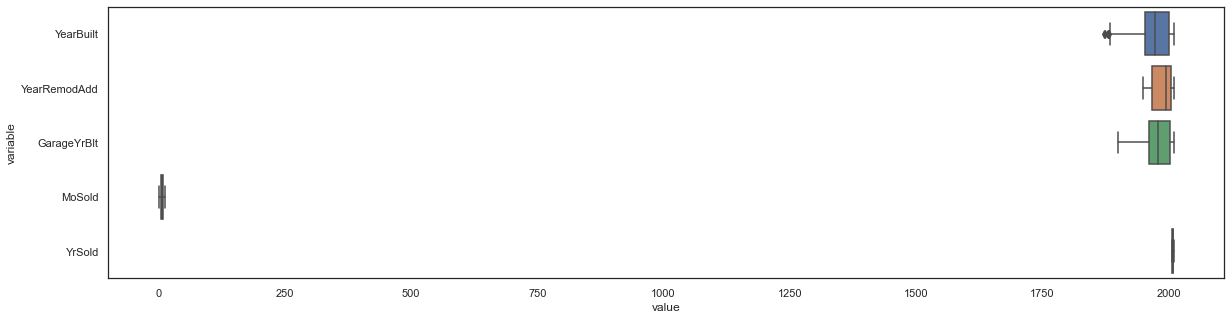

In [1060]:
#Lets also check outliers in year and month data
plt.figure(figsize=(20,5))
sns.boxplot(x="value", y="variable",data=pd.melt(hd[year_month]))
plt.show()

In [1061]:
numeric.append("LotArea")
numeric.append("MiscVal")

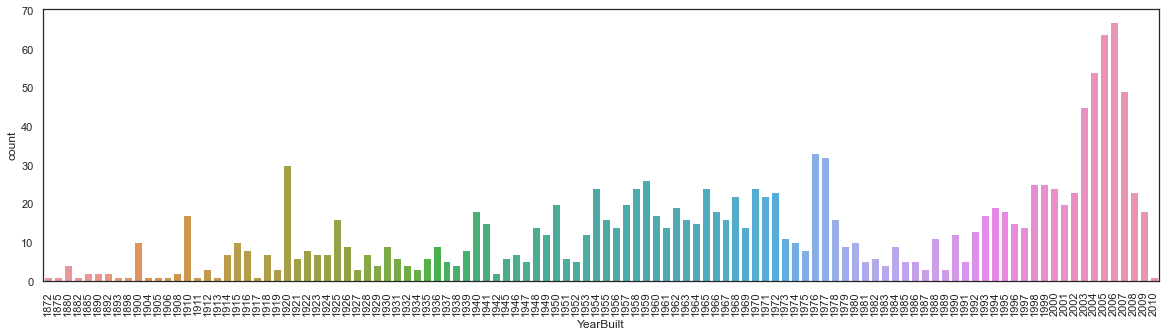

In [1062]:
#Lets Visualize frequency of houses built in each year
#year_month = ["YearBuilt","YearRemodAdd","GarageYrBlt","MoSold","YrSold"]
hd_YearBuilt=hd.sort_values("YearBuilt", axis =0)
plt.figure(figsize=(20,5))
sns.countplot(hd_YearBuilt["YearBuilt"])
plt.xticks(rotation =90)
plt.show()

There is a significant increase in houses being built around 2003 to 2007, may be leading to housing crash of 2008 :p

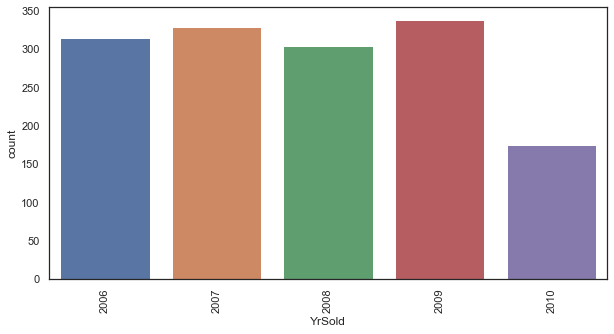

In [1063]:
#Lets Visualize frequency of sales made in each year
hd_YrSold=hd.sort_values("YrSold", axis =0)
plt.figure(figsize=(10,5))
sns.countplot(hd_YrSold["YrSold"])
plt.xticks(rotation =90)
plt.show()

There is no regular trend among no. of houses sold except that no. of houses sold in 2010 has significantly decreased, however we donot know whether data is for complete year 2010  or not, so will not speculate regarding this.

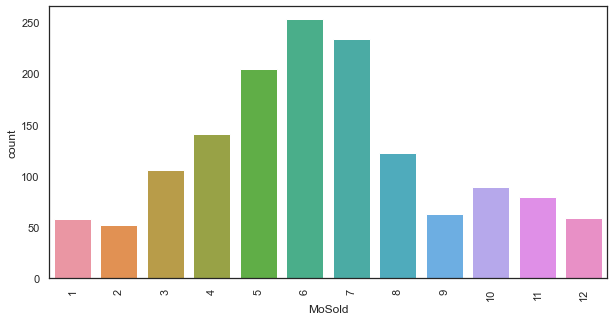

In [1064]:
#Lets Visualize frequency of sales made in each month
hd_MoSold=hd.sort_values("MoSold", axis =0)
plt.figure(figsize=(10,5))
sns.countplot(hd_MoSold["MoSold"])
plt.xticks(rotation =90)
plt.show()

It seems like sales are higher in the month of May, June and July comapared to other months of year.

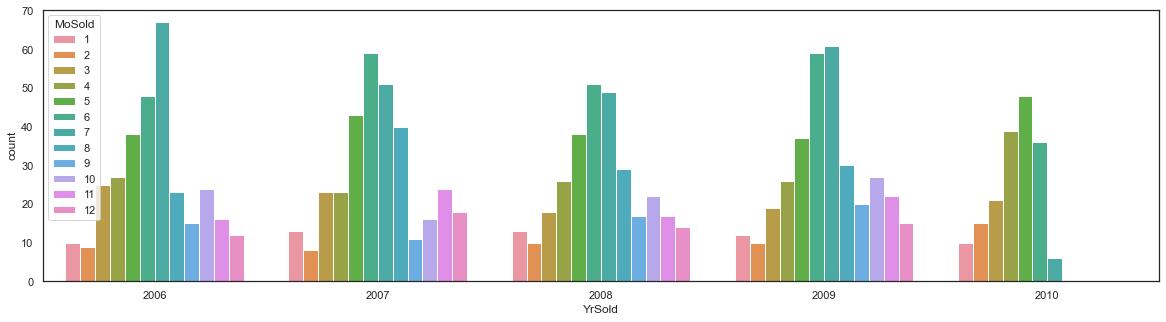

In [1065]:
#Lets check whether above trend is same for all years in which houses were sold
plt.figure(figsize=(20,5))
#hd_month_yr=hd.groupby(["YrSold","MoSold"]).count().reset_index()
#hd_month_yr
sns.countplot(data=hd, x="YrSold", hue="MoSold")
plt.show()

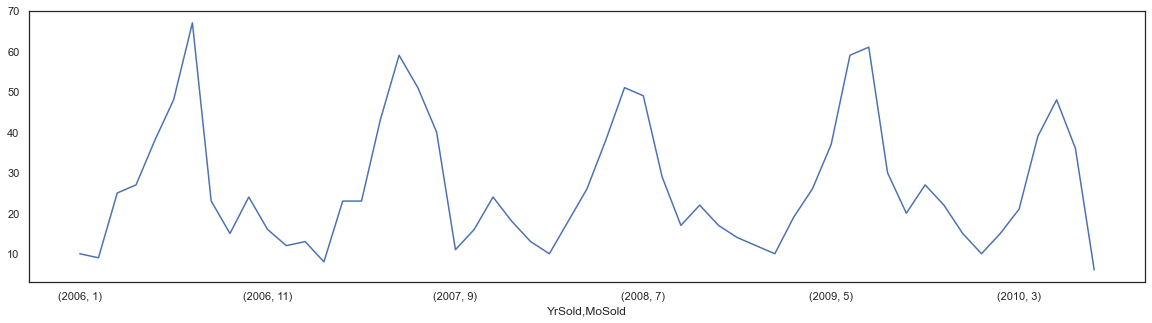

In [1066]:
plt.figure(figsize=(20,5))
hd_month_yr=hd.groupby(["YrSold","MoSold"])["MoSold"].count().plot()
plt.show()

From above it is observed that sales are higher in the month of May, June and July compared to other months of year may be due spring season as the weather gets warmer in USA. Further, there is very small peak in month of October/Novemeber in sale of houses.
Also for year 2010 data is available till July month only.

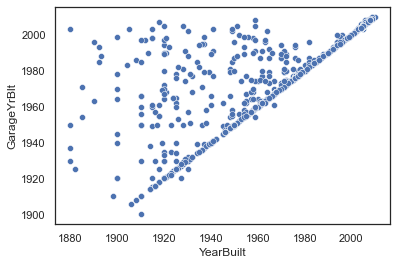

In [1067]:
#Lets Visualize distribution among YearBuilt & GarageYrBlt
sns.scatterplot(data=hd,x="YearBuilt",y="GarageYrBlt")
plt.show()

After 1910 almost all the house are having garrages built along with construction of house due to rise in no of car user by 1910 in US.
- Source:
https://www.ushistory.org/us/46a.asp

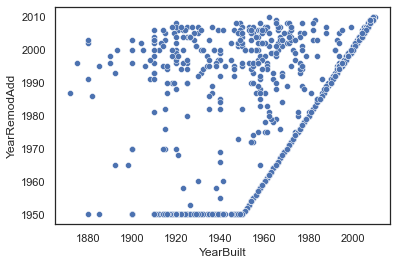

In [1068]:
#Lets Visualize distribution among YearBuilt & YearRemodAdd
sns.scatterplot(data=hd,x="YearBuilt",y="YearRemodAdd")
plt.show()

After 1950 there has been no remodeling or additions performed on houses as in data it is specified that YearRemodAdd is same as construction date if no remodeling or additions.

plt.figure(figsize=(20,20))
sns.heatmap(hd[numeric].corr(),annot= True,cmap="YlGnBu")
plt.show()

There are few columns with high corelation like (BsmtFinSF2 and BsmtfullBath),(GarageCars and Garage Area), (Ground Living area and TotRmsaboveGr),(Bedroom above ground and Total Room above Ground), (TotalBasment SF and  1st floor SF)  etc.

#Lets visualize countplot on Numeric data
plt.subplots(figsize=(20,110))
j=1
for i in numeric:
    plt.subplot(int((len(nominal)/2)+1),3,j)
    sns.scatterplot(data=hd, x=i ,y="SalePrice")
    j=j+1

There are many independent Variable on which there is high correlation with Sale price like GrLivArea, TotalBsmtSF,Garage Area, 1stflrSF etc

#Lets visualize countplot on Nominal data
#plt.subplots(figsize=(20,110))
j=1
for i in nominal:
    plt.subplot(int((len(nominal)/2)+1),3,j)
    sns.countplot(hd[i])
    plt.xticks(rotation=90)
    j=j+1


Lets visualize distribution of sales price on Nominal data
plt.subplots(figsize=(20,120))
j=1
for i in nominal:
    plt.subplot(int((len(nominal)/2)+1),2,j)
    sns.barplot(data=hd, x=i, y="SalePrice", estimator=np.median) # as there are outliers in data median is selected as estimator
    plt.xticks(rotation=90)
    j=j+1

## 3.  Data Cleaning

### 3.1. Treating Outliers

As features columns have many outliers, we are going to drop outliers from the dataset and try to fit the algorithm. For dropping the outliers we are going to use Inter Quantile Range (IQR) method which is summarized below.

- Q1: First quanltile value or Value standing exactly at 10% (here).
- Q3: Value standing at exactly 90% (here) of the range.
- IQR is difference between Q3 and Q1 value. 

This indicates the core range for any feature which includes median as well.
Next is to drop the values which are beyond 1.5 times IQR away from either Q1 or Q3 in respective away direction. Here, away direction for Q1 is lower side and Q3 is upper side.

Note: Here we can use any value for selecting quantiles. The chosen values depend upon the amount of data available and its quality. Also we should not lose significant value of data while dropping outliers.

In [1069]:
#Lets check % of outliers in the numeric variables
outlietrs_dict={}
for i in numeric:
  #IQR
  IQR= hd[i].quantile(0.90)-hd[i].quantile(0.10)
  Outliers= hd[(hd[i]>(hd[i].quantile(0.9)+1.5 * IQR)) | (hd[i]<(hd[i].quantile(0.10)-1.5 * IQR))]
  outlietrs_dict[i]=Outliers.shape[0]

In [1070]:
outlier_data=pd.DataFrame([outlietrs_dict]).T
outlier_data.rename(columns={0:"No_of_outliers"}, inplace =True)
outlier_data["Outlier%"]=outlier_data["No_of_outliers"]/hd.shape[0]*100
outlier_data.sort_values("Outlier%", ascending =False, inplace =True)
outlier_data

,No_of_outliers,Outlier%
ScreenPorch,116,7.945205
BsmtFinSF2,94,6.438356
BsmtHalfBath,82,5.616438
KitchenAbvGr,68,4.657534
MiscVal,52,3.561644
LowQualFinSF,26,1.780822
LotArea,24,1.643836
3SsnPorch,24,1.643836
MasVnrArea,13,0.890411
EnclosedPorch,9,0.616438


In [1071]:
#As seen above there are lots of outliers in the dataset as we have limited data removing theses rows won't be a good idea.
#Let us perform flooring and capping on outliers

for i in numeric:
    IQR= hd[i].quantile(0.90)-hd[i].quantile(0.10) #Interquartile range
    upper_bound=hd[i].quantile(0.90)+1.5 * IQR
    lower_bound=hd[i].quantile(0.10)-1.5 * IQR
    #Capping
    hd[i]=np.where(hd[i]>upper_bound, upper_bound,hd[i])
    #Flooring
    hd[i]=np.where(hd[i]<lower_bound, lower_bound,hd[i])
    

In [1072]:
#Lets check % of outliers in the numeric variables after capping and flooring
outlietrs_dict={}
for i in numeric:
  #IQR
  IQR= hd[i].quantile(0.90)-hd[i].quantile(0.10)
  Outliers= hd[(hd[i]>(hd[i].quantile(0.90)+1.5 * IQR)) | (hd[i]<(hd[i].quantile(0.10)-1.5 * IQR))]
  outlietrs_dict[i]=Outliers.shape[0]

outlier_data=pd.DataFrame([outlietrs_dict]).T
outlier_data.rename(columns={0:"No_of_outliers"}, inplace =True)
outlier_data["Outlier%"]=outlier_data["No_of_outliers"]/hd.shape[0]*100
outlier_data.sort_values("Outlier%", ascending =False, inplace =True)
outlier_data

,No_of_outliers,Outlier%
LotFrontage,0,0.0
MasVnrArea,0,0.0
LotArea,0,0.0
BsmtFinSF2,0,0.0
BsmtFinSF1,0,0.0
PoolArea,0,0.0
ScreenPorch,0,0.0
3SsnPorch,0,0.0
EnclosedPorch,0,0.0
OpenPorchSF,0,0.0


On close observation of `["ScreenPorch","BsmtHalfBath","KitchenAbvGr", "LowQualFinSF", "3SsnPorch", "PoolArea"]`  it is seen that all the inputs are either zeros, except`KitchenAbvGr` in which all inputs are ones, thus these columns may be dropped, as same value in all the columns will not result in any contrbution towards final model.

In [1073]:
hd=hd.drop(["ScreenPorch","BsmtHalfBath","KitchenAbvGr", "LowQualFinSF", "3SsnPorch", "PoolArea"], axis=1)
Var_drop=['LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', '3SsnPorch', 'ScreenPorch', 'PoolArea']
for i in Var_drop:
    numeric.remove(i)

## 3.2 Treating Missing values

In [1074]:
# Checking columns with null value 
hd.isnull().sum()/hd.shape[0]*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
T

In [1075]:
#Lets impute median value as missing values in numeric columns
num_missing=["LotFrontage","MasVnrArea","GarageYrBlt"]
for i in num_missing:
    hd[i]=hd[i].fillna(hd[i].median())

In [1076]:
#Lets impute mode value as missing values in categorical columns
Cat_missing=["MasVnrType", "Electrical"]
for i in Cat_missing:
    hd[i]=hd[i].fillna(hd[i].mode()[0])
# for BsmtQual, BsmtCond, BsmtExposure,BsmtFinType1,BsmtFinType2,GarageType,GarageFinish,GarageQual,GarageCond  
#"NA" means No basement/No Garage
hd["BsmtQual"]=hd["BsmtQual"].fillna("No basement")
hd["BsmtCond"]=hd["BsmtCond"].fillna("No basement")
hd["BsmtExposure"]=hd["BsmtExposure"].fillna("No basement")
hd["BsmtFinType1"]=hd["BsmtFinType1"].fillna("No basement")
hd["BsmtFinType2"]=hd["BsmtFinType2"].fillna("No basement")
hd["GarageType"]=hd["GarageType"].fillna("No Garage")
hd["GarageFinish"]=hd["GarageFinish"].fillna("No Garage")
hd["GarageQual"]=hd["GarageQual"].fillna("No Garage")
hd["GarageCond"]=hd["GarageCond"].fillna("No Garage")

In [1077]:
# Checking columns with null value 
hd.isnull().sum()/hd.shape[0]*100

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
GrLivArea        0.0
BsmtFullBath     0.0
FullBath         0.0
HalfBath     

## 4. Data Preperation

Now as we know have of many categorical variables, we need to treat these  variables in order to draw patterns from them through modelling.Now we have two types of categorical variables:
1. Nominal categorical variables
2. Ordered categorical variables

- For Nominal Nominal categorical variables we will create dummy variables; for `k` no of labels/categories in variables we will define `k-1` no. of features and original variable shall be dropped.
- For Ordered categorical variables we will implement Label encoding in incresing order of categories in variable as 0,1,2,3,4,....

### 4.1 Nominal categorical variables

In [1078]:
nominal = ["MSSubClass","MSZoning","Street","LandContour","Utilities","LotConfig","LandSlope"
    ,"Neighborhood","Condition1","Condition2","BldgType","HouseStyle","RoofStyle","RoofMatl","Exterior1st"
    ,"Exterior2nd","MasVnrType","Foundation","Heating","HeatingQC","CentralAir","Electrical","Functional"
    ,"GarageType","PavedDrive","SaleType","SaleCondition"]


In [1079]:
#Creating dummy variables for all the categorical variables
for i in nominal:
    dummy_df=pd.get_dummies(hd[i],prefix=i, drop_first =True)
    hd=pd.concat([hd,dummy_df], axis=1)
    hd=hd.drop([i], axis=1)

### 4.2 Ordered categorical variables

In [1080]:
ordinal = ["LotShape","OverallQual","OverallCond","ExterQual","ExterCond","BsmtQual","BsmtCond","BsmtExposure",
         "BsmtFinType1","BsmtFinType2","KitchenQual","GarageFinish","GarageQual","GarageCond"]

In [1081]:
#Few of variables are already labeled as per rating like OverallQual,OverallCond etc.
# Creating Label Encoding for LotShape
def Label_encoder(feature):
    if feature == "IR3": return 1
    elif feature=="IR2": return 2
    elif feature=="IR1": return 3
    elif feature =="Reg": return 4
hd["LotShape"]=hd["LotShape"].apply(Label_encoder)

In [1082]:
# Creating Label Encoding for ExterQual
def Label_encoder(feature):
    if feature == "Po": return 1
    elif feature=="Fa": return 2
    elif feature=="TA": return 3
    elif feature =="Gd": return 4
    elif feature =="Ex": return 5
hd["ExterQual"]=hd["ExterQual"].apply(Label_encoder)

In [1083]:
# Creating Label Encoding for ExterCond
def Label_encoder(feature):
    if feature == "Po": return 1
    elif feature=="Fa": return 2
    elif feature=="TA": return 3
    elif feature =="Gd": return 4
    elif feature =="Ex": return 5
hd["ExterCond"]=hd["ExterCond"].apply(Label_encoder)

In [1084]:
# Creating Label Encoding for BsmtQual
def Label_encoder(feature):
    if feature == "No basement": return 0
    elif feature=="Po": return 1
    elif feature=="Fa": return 2
    elif feature=="TA": return 3
    elif feature =="Gd": return 4
    elif feature =="Ex": return 5
hd["BsmtQual"]=hd["BsmtQual"].apply(Label_encoder)

In [1085]:
#Creating Label Encoding for BsmtCond
def Label_encoder(feature):
    if feature == "No basement": return 0
    elif feature=="Po": return 1
    elif feature=="Fa": return 2
    elif feature=="TA": return 3
    elif feature =="Gd": return 4
    elif feature =="Ex": return 5
hd["BsmtCond"]=hd["BsmtCond"].apply(Label_encoder)

In [1086]:
#Creating Label Encoding for BsmtExposure
def Label_encoder(feature):
    if feature == "No basement": return 0
    elif feature=="No": return 1
    elif feature=="Mn": return 2
    elif feature=="Av": return 3
    elif feature =="Gd": return 4
hd["BsmtExposure"]=hd["BsmtExposure"].apply(Label_encoder)

In [1087]:
#Creating Label Encoding for BsmtFinType1
def Label_encoder(feature):
    if feature == "No basement": return 0
    elif feature=="Unf": return 1
    elif feature=="LwQ": return 2
    elif feature=="Rec": return 3
    elif feature =="BLQ": return 4
    elif feature =="ALQ": return 5
    elif feature =="GLQ": return 6
hd["BsmtFinType1"]=hd["BsmtFinType1"].apply(Label_encoder)

In [1088]:
#Creating Label Encoding for BsmtFinType2
def Label_encoder(feature):
    if feature == "No basement": return 0
    elif feature=="Unf": return 1
    elif feature=="LwQ": return 2
    elif feature=="Rec": return 3
    elif feature =="BLQ": return 4
    elif feature =="ALQ": return 5
    elif feature =="GLQ": return 6
hd["BsmtFinType2"]=hd["BsmtFinType2"].apply(Label_encoder)

In [1089]:
#Creating Label Encoding for KitchenQual
def Label_encoder(feature):
    if feature == "Poor": return 1
    elif feature=="Fa": return 2
    elif feature=="TA": return 3
    elif feature=="Gd": return 4
    elif feature =="Ex": return 4
hd["KitchenQual"]=hd["KitchenQual"].apply(Label_encoder)

In [1090]:
#Creating Label Encoding for GarageFinish
def Label_encoder(feature):
    if feature == "No Garage": return 0
    elif feature=="Unf": return 1
    elif feature=="RFn": return 2
    elif feature=="Fin": return 3
hd["GarageFinish"]=hd["GarageFinish"].apply(Label_encoder)

In [1091]:
#Creating Label Encoding for GarageQual
def Label_encoder(feature):
    if feature == "No Garage": return 0
    elif feature=="Po": return 1
    elif feature=="Fa": return 2
    elif feature=="TA": return 3
    elif feature=="Gd": return 4
    elif feature=="Ex": return 5
hd["GarageQual"]=hd["GarageQual"].apply(Label_encoder)

In [1092]:
#Creating Label Encoding for GarageCond
def Label_encoder(feature):
    if feature == "No Garage": return 0
    elif feature=="Po": return 1
    elif feature=="Fa": return 2
    elif feature=="TA": return 3
    elif feature=="Gd": return 4
    elif feature=="Ex": return 5
hd["GarageCond"]=hd["GarageCond"].apply(Label_encoder)

In [1093]:
#Lets check corelation among data
#plt.figure(figsize=(50,50))
#sns.heatmap(hd.corr())
#plt.show()

In [1094]:
hd=hd.drop(["Id"], axis =1)

## 5. Model Development-validation and evaluaiton

In [1095]:
 #As dataset is already provided as train data, test_train split shall not be required in instant case.
from sklearn.model_selection import train_test_split
hd_train,hd_test=train_test_split(hd, train_size=0.7, random_state=100)

In [1096]:
#We need to scale the data in order to interpret data and to expedite the process of gradient descent
from sklearn.preprocessing import StandardScaler
#Creating scaler object
scaler=StandardScaler()
# Now standardiztion needs to be performed on all the numeric and label encoded varaibles
vars_scale=numeric+ordinal+year_month+["SalePrice"]
hd_train[vars_scale]=scaler.fit_transform(hd_train[vars_scale])
hd_test[vars_scale]=scaler.transform(hd_test[vars_scale])


In [1097]:
hd_train.head()

,LotFrontage,LotArea,LotShape,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,MiscVal,MoSold,YrSold,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
318,0.982619,0.000668,0.694105,0.648310,-0.532073,0.715324,0.389207,0.896770,1.051361,-0.260816,0.577925,0.123940,2.143653,1.138412,1.228475,-0.278494,-0.341825,-0.454262,0.665726,0.532325,2.137583,2.198320,1.072205,0.784821,1.244440,1.406542,1.012226,1.555150,0.634015,0.590876,0.320660,1.646935,0.867501,0.268059,0.270467,2.016094,0.214132,2.004413,0.0,-0.833178,0.882411,1.004170,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,

In [1098]:
X_train=hd_train.drop(["SalePrice"], axis=1)
y_train=hd_train["SalePrice"]
X_test=hd_test.drop(["SalePrice"], axis=1)
y_test=hd_test["SalePrice"]

# MiscVal contains zero only

In [1099]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [1100]:
y_pred=lr.predict(X_train)

In [1101]:
res=y_pred-y_train

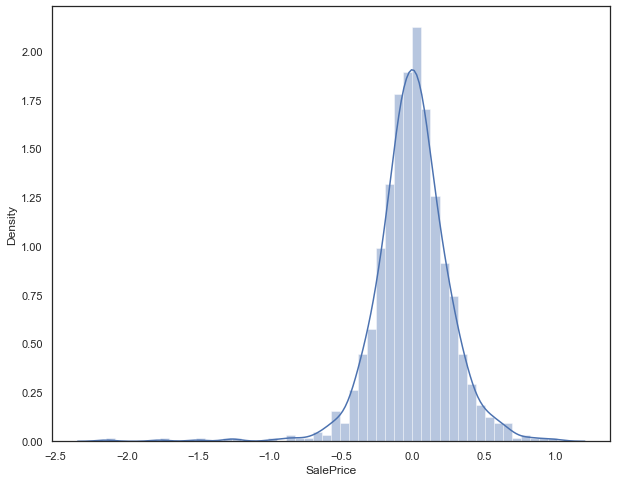

In [1102]:
plt.figure(figsize=(10,8))
sns.distplot(res)
plt.show()

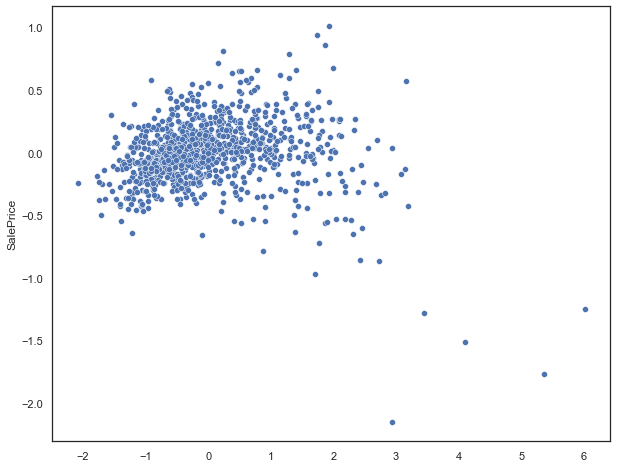

In [1103]:
plt.figure(figsize=(10,8))
sns.scatterplot(y_pred, res)
plt.show()

In [1104]:
from sklearn.metrics import r2_score
R2=r2_score(y_train,y_pred)
R2

0.9312612833311604

In [1105]:
y_test_pred=lr.predict(X_test)

In [1106]:
y_test.shape

(439,)

In [1107]:
R2_test=r2_score(y_test,y_test_pred)
R2_test

-2.253680250949569e+22

In [1108]:
#Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
folds=5
ridge=Ridge()
score_params=["r2","neg_mean_absolute_error","neg_mean_squared_error"]
parmas={"alpha":[0,0.001,0.01,0.1,1,10,20,30,40,50,100,1000]}
for score in score_params:
    model_cv=GridSearchCV(estimator=ridge,
                         param_grid =parmas,
                         scoring=score,
                         cv=folds,
                         verbose=1,
                         return_train_score=True)
    model_cv.fit(X_train, y_train)
    print(model_cv.best_params_ )
        

Fitting 5 folds for each of 12 candidates, totalling 60 fits
{'alpha': 30}
Fitting 5 folds for each of 12 candidates, totalling 60 fits
{'alpha': 20}
Fitting 5 folds for each of 12 candidates, totalling 60 fits
{'alpha': 20}


In [1109]:
ridge=Ridge(20)
ridge.fit(X_train, y_train)

Ridge(alpha=20)

In [1110]:
y_train_pred=ridge.predict(X_train)
y_test_pred=ridge.predict(X_test)
Coeff_ridge=pd.DataFrame({"Variable":X_train.columns, "coeff_ridge":ridge.coef_ })
Coeff_ridge.sort_values(by="coeff_ridge", ascending =False, inplace =True)
Coeff_ridge

,Variable,coeff_ridge
85,Neighborhood_NridgHt,0.261216
84,Neighborhood_NoRidge,0.230311
20,2ndFlrSF,0.193763
3,OverallQual,0.192859
21,GrLivArea,0.187900
131,RoofMatl_WdShngl,0.185555
114,HouseStyle_1Story,0.135184
95,Condition1_Norm,0.134559
75,Neighborhood_Crawfor,0.132028
18,TotalBsmtSF,0.119316


In [1111]:
#Checking r2 score and mean_squared_error on tet and train data after Ridgr Regression
from sklearn.metrics import r2_score, mean_squared_error
print("R squared value for Train data is: ", round(r2_score(y_train, y_train_pred),3))
print("R squared value for Test data is: ", round(r2_score(y_test, y_test_pred),3))
print("Mean Squared value for Train data is: ", round(mean_squared_error(y_train, y_train_pred),5))
print("Mean Squared for Test data is: ", round(mean_squared_error(y_test, y_test_pred),5))

R squared value for Train data is:  0.881
R squared value for Test data is:  0.867
Mean Squared value for Train data is:  0.11936
Mean Squared for Test data is:  0.13707


In [1113]:
#Ridge Regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
folds=5
lasso=Lasso()
score_params=["r2","neg_mean_absolute_error","neg_mean_squared_error"]
parmas={"alpha":[0,0.0008,0.0009,0.001,0.0011,0.0015,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01,0.1,1,10]}
for score in score_params:
    model_cv=GridSearchCV(estimator=lasso,
                         param_grid =parmas,
                         scoring=score,
                         cv=folds,
                         verbose=1,
                         return_train_score=True)
    model_cv.fit(X_train, y_train)
    print(model_cv.best_params_ )

Fitting 5 folds for each of 18 candidates, totalling 90 fits
{'alpha': 0.002}
Fitting 5 folds for each of 18 candidates, totalling 90 fits
{'alpha': 0.002}
Fitting 5 folds for each of 18 candidates, totalling 90 fits
{'alpha': 0.0015}


In [1125]:
lasso=Lasso(0.015)
lasso.fit(X_train, y_train)

Lasso(alpha=0.015)

In [1126]:
y_train_pred=lasso.predict(X_train)
y_test_pred=lasso.predict(X_test)
Coeff_lasso=pd.DataFrame({"Variable":X_train.columns, "coeff_lasso":lasso.coef_ })
Coeff_lasso.sort_values(by="coeff_lasso", ascending =False, inplace =True)
Coeff_lasso

,Variable,coeff_lasso
21,GrLivArea,0.307031
3,OverallQual,0.246190
8,ExterQual,0.115114
18,TotalBsmtSF,0.106682
14,BsmtFinSF1,0.090887
31,GarageCars,0.085307
95,Condition1_Norm,0.062421
5,YearBuilt,0.060383
1,LotArea,0.060139
12,BsmtExposure,0.057843


In [1131]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [1132]:
help(variance_inflation_factor)

Help on function variance_inflation_factor in module statsmodels.stats.outliers_influence:

variance_inflation_factor(exog, exog_idx)
    variance inflation factor, VIF, for one exogenous variable
    
    The variance inflation factor is a measure for the increase of the
    variance of the parameter estimates if an additional variable, given by
    exog_idx is added to the linear regression. It is a measure for
    multicollinearity of the design matrix, exog.
    
    One recommendation is that if VIF is greater than 5, then the explanatory
    variable given by exog_idx is highly collinear with the other explanatory
    variables, and the parameter estimates will have large standard errors
    because of this.
    
    Parameters
    ----------
    exog : ndarray
        design matrix with all explanatory variables, as for example used in
        regression
    exog_idx : int
        index of the exogenous variable in the columns of exog
    
    Returns
    -------
    vif : float

In [1127]:
#Checking r2 score and mean_squared_error on tet and train data after Ridgr Regression
from sklearn.metrics import r2_score, mean_squared_error
print("R squared value for Train data is: ", round(r2_score(y_train, y_train_pred),3))
print("R squared value for Test data is: ", round(r2_score(y_test, y_test_pred),3))
print("Mean Squared value for Train data is: ", round(mean_squared_error(y_train, y_train_pred),5))
print("Mean Squared for Test data is: ", round(mean_squared_error(y_test, y_test_pred),5))

R squared value for Train data is:  0.831
R squared value for Test data is:  0.837
Mean Squared value for Train data is:  0.16898
Mean Squared for Test data is:  0.16737
